# Probelm - 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

**1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Mark)**

In [1]:
import numpy as np   
import pandas as pd
import os
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
import matplotlib.style
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('Election_Data.xlsx')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [6]:
df=df.drop('Unnamed: 0', axis=1)

In [7]:
for column in df.columns:
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


AGE :  70
93     1
90     1
91     1
92     2
87     3
      ..
46    37
47    38
35    39
49    39
37    42
Name: age, Length: 70, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [8]:
df1=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]

In [9]:
for column in df1:
    df[column]=df[column].astype("object")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [11]:
#add a new column category next to the age group. 
category = pd.cut(df.age,
                  bins=[0,35,50,65,80,99],
                  labels=[1,2,3,4,5])
df.insert(6,'Age_Group',category)
df['Age_Group'].value_counts()

2    479
3    416
4    367
1    201
5     62
Name: Age_Group, dtype: int64

In [12]:
cat=["vote","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender", "Age_Group"]

In [13]:
for i in cat:
    df[i]=df[i].astype("object")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Age_Group                1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political.knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(1), object(9)
memory usage: 119.3+ KB


In [15]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812
Age_Group,1525,5,2,479


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [17]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Age_Group                  0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Age_Group,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,1,3,2,male
626,Labour,39,3,4,4,2,2,5,2,male
870,Labour,38,2,4,2,2,2,4,3,male
983,Conservative,74,4,3,2,4,4,8,2,female
1154,Conservative,53,3,4,2,2,3,6,0,female
1236,Labour,36,3,3,2,2,2,6,2,female
1244,Labour,29,4,4,4,2,1,2,2,female
1438,Labour,40,4,3,4,2,2,2,2,male


In [19]:
df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge":"political_knowledge"},inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   object
 3   economic_cond_household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Age_Group                1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political_knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(1), object(9)
memory usage: 119.3+ KB


In [21]:
df.skew()

age                        0.144621
economic_cond_national    -0.240453
economic_cond_household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Age_Group                  0.092862
Europe                    -0.135947
political_knowledge       -0.426838
dtype: float64

In [22]:
df.shape

(1525, 10)

**1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.**

**UNIVARIATE ANALYSIS & BIVARIATE ANALYSIS**

To check outliers

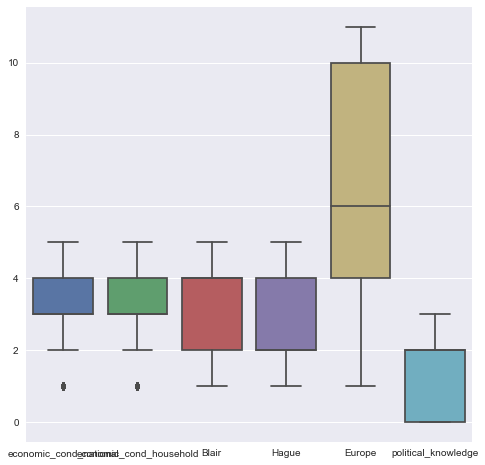

In [23]:
f, ax = plt.subplots(figsize = (8,8))
sns.set_color_codes('pastel')
sns.boxplot(data=df[['economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']] ,
                orient = "v")

Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns

PLOTS and CHARTS on VOTES, GENDER and AGE GROUP

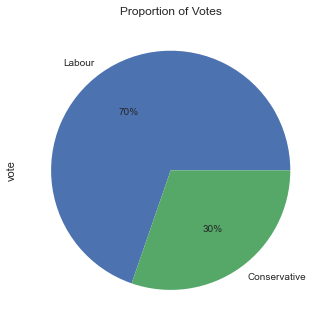

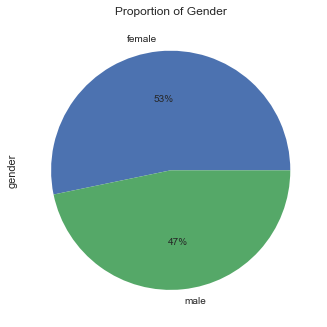

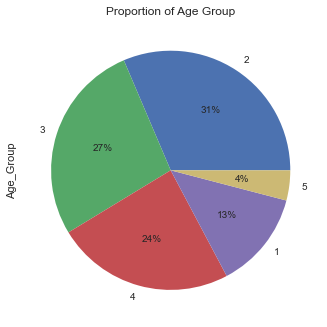

In [24]:
plt.figure(0)
df.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Proportion of Votes')

plt.figure(1)
df.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Proportion of Gender')

plt.figure(2)
df.Age_Group.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Proportion of Age Group')

plt.show()

Text(13.169123263888892, 0.5, 'Count of Votes')

<Figure size 864x576 with 0 Axes>

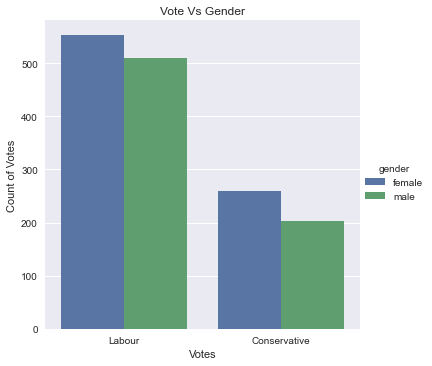

In [25]:
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes')

economic_cond_national vs VOTE(Labour & Conservative)

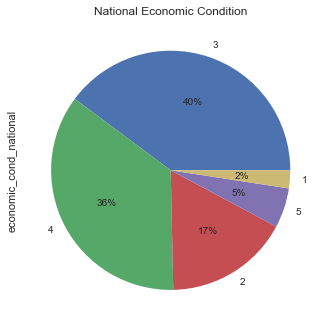

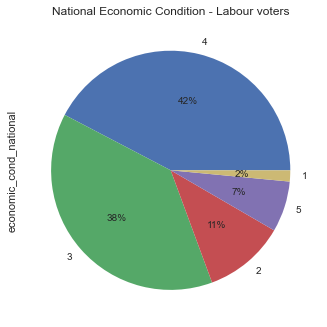

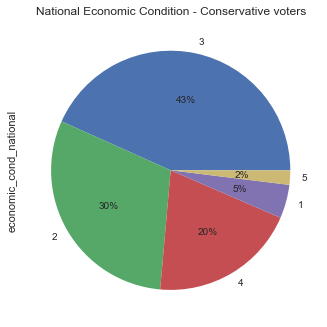

In [26]:
plt.figure(0)
df.economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('National Economic Condition')

plt.figure(1)
df[df.vote == "Labour"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('National Economic Condition - Labour voters')

plt.figure(2)
df[df.vote == "Conservative"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('National Economic Condition - Conservative voters')

plt.show()

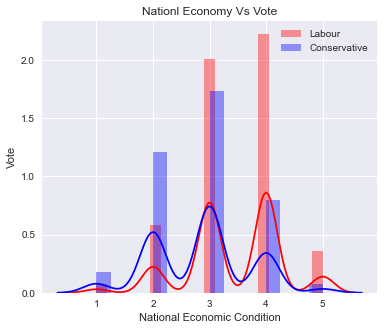

In [27]:
plt.figure(figsize=(6,5))
sns.distplot(df[df.vote=='Labour'].economic_cond_national, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_national, label = 'Conservative', color = 'blue')
plt.title("Nationl Economy Vs Vote",fontsize=12)
plt.xlabel('National Economic Condition')
plt.ylabel('Vote')
plt.legend(ncol=1)
plt.show()

economic_cond_household vs VOTE(Labour & Conservative)

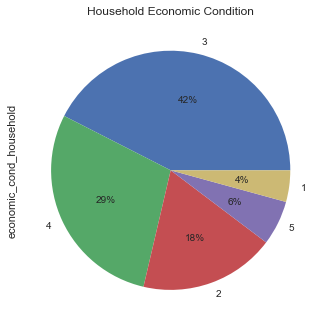

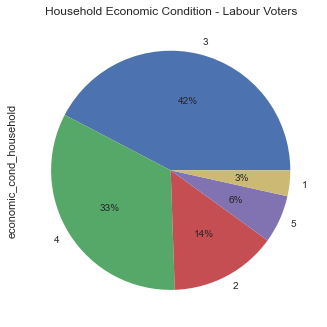

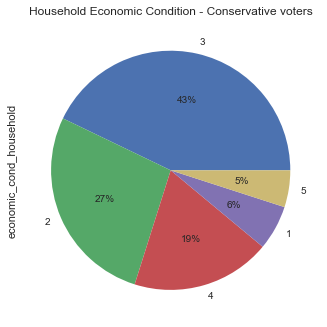

In [28]:
plt.figure(0)
df.economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Household Economic Condition')

plt.figure(1)
df[df.vote == "Labour"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Household Economic Condition - Labour Voters')

plt.figure(2)
df[df.vote == "Conservative"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Household Economic Condition - Conservative voters')

plt.show()

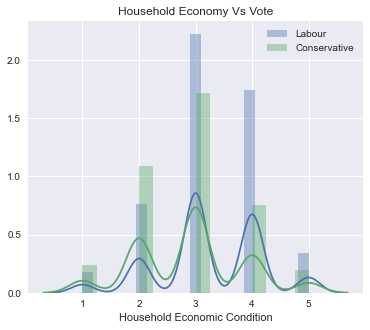

In [29]:
plt.subplots(figsize = (6,5))
sns.distplot(df[df.vote=='Labour'].economic_cond_household, label = 'Labour')
sns.distplot(df[df.vote=='Conservative'].economic_cond_household, label = 'Conservative')
plt.title("Household Economy Vs Vote")
plt.xlabel('Household Economic Condition')
plt.legend(ncol = 1)

plt.show()

Assessment on Blair vs VOTE(Labour & Conservative)

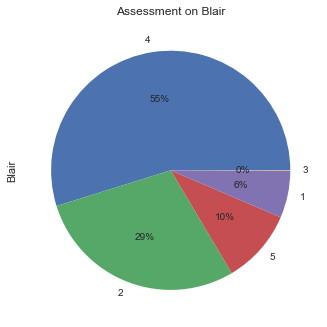

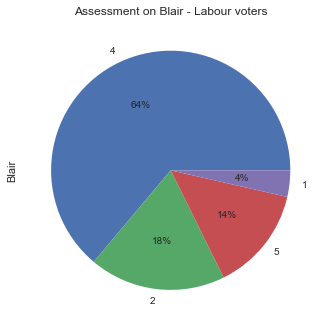

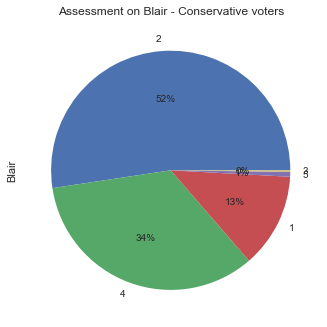

In [30]:
plt.figure(0)
df.Blair.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Assessment on Blair')

plt.figure(1)
df[df.vote == "Labour"].Blair.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Assessment on Blair - Labour voters')

plt.figure(2)
df[df.vote == "Conservative"].Blair.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Assessment on Blair - Conservative voters')

plt.show()

Text(0, 0.5, 'Count of Votes')

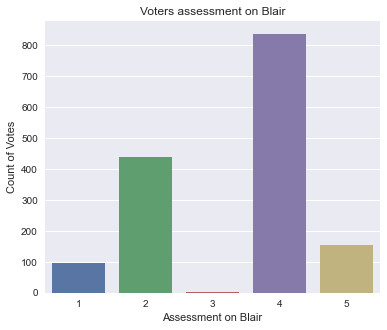

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(df.Blair)
plt.title('Voters assessment on Blair')
plt.xlabel('Assessment on Blair')
plt.ylabel('Count of Votes')

HAGUE vs VOTE(Labour & Conservative)

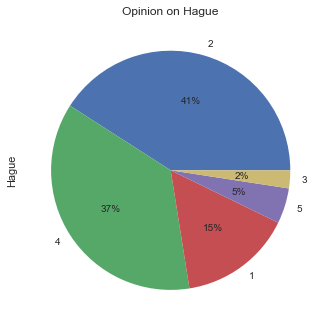

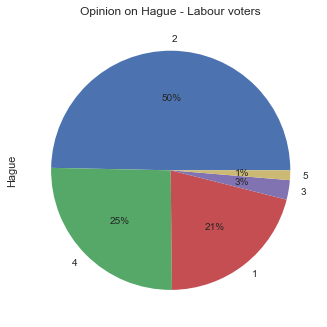

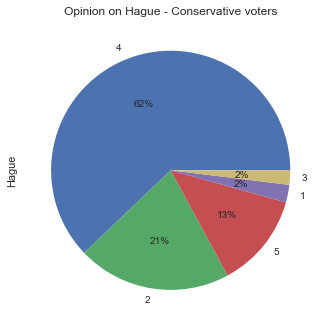

In [32]:
plt.figure(0)
df.Hague.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Opinion on Hague')

plt.figure(1)
df[df.vote == "Labour"].Hague.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Opinion on Hague - Labour voters')

plt.figure(2)
df[df.vote == "Conservative"].Hague.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('Opinion on Hague - Conservative voters')

plt.show()

Text(0, 0.5, 'Count of Votes')

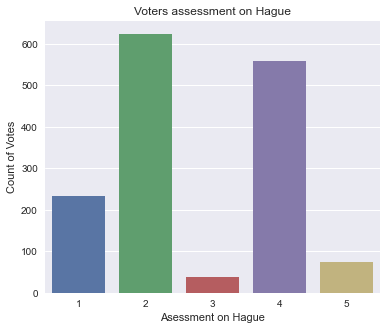

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(df.Hague)
plt.title('Voters assessment on Hague')
plt.xlabel('Asessment on Hague')
plt.ylabel('Count of Votes')


POLITICAL.KNOWLEDGE VS VOTE(Labour & Conservative)

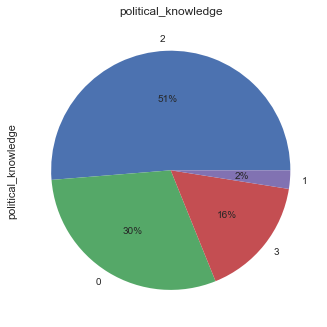

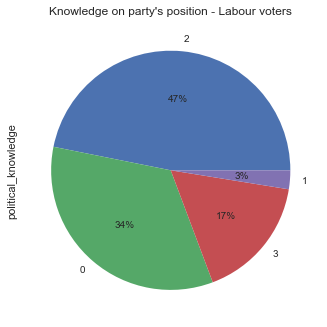

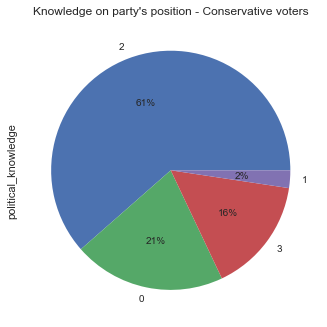

In [34]:
plt.figure(0)
df.political_knowledge.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title('political_knowledge')

plt.figure(1)
df[df.vote == "Labour"].political_knowledge.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title("Knowledge on party's position - Labour voters")

plt.figure(2)
df[df.vote == "Conservative"].political_knowledge.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title("Knowledge on party's position - Conservative voters")

plt.show()

Text(0, 0.5, 'Count of Votes')

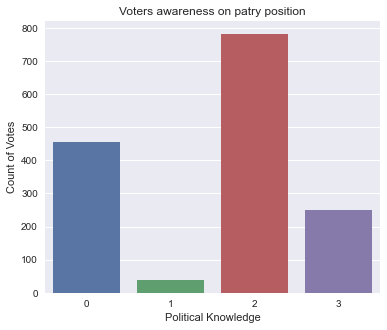

In [35]:
plt.figure(figsize=(6,5))
sns.countplot(df.political_knowledge)
plt.title('Voters awareness on patry position')
plt.xlabel('Political Knowledge')
plt.ylabel('Count of Votes')

EUROSCEPTISM vs VOTE/ AGE GROUP/ AGE/ GENDER 

<Figure size 864x576 with 0 Axes>

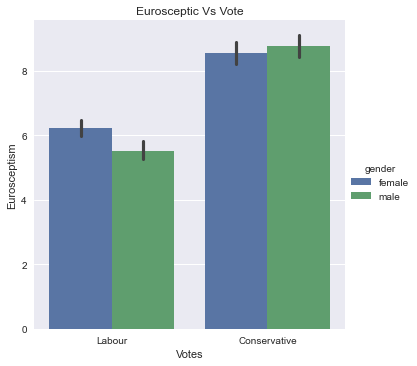

In [36]:
plt.figure(figsize=(12,8))
sns.catplot(x="vote", y="Europe", hue = 'gender', kind="bar", data=df)
plt.title('Eurosceptic Vs Vote')
plt.xlabel('Votes')
plt.ylabel('Eurosceptism')

plt.show()

<Figure size 864x576 with 0 Axes>

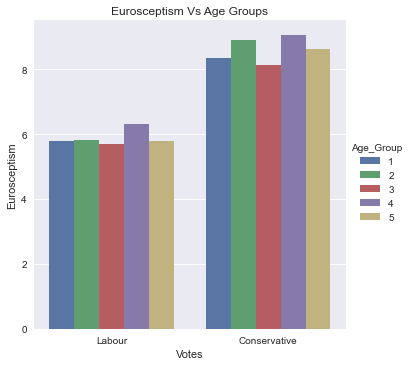

In [37]:
plt.figure(figsize=(12,8))
sns.catplot(x="vote", y="Europe", hue = 'Age_Group', kind="bar", data=df, ci=None)
plt.title('Eurosceptism Vs Age Groups')
plt.xlabel('Votes')
plt.ylabel('Eurosceptism')

plt.show()

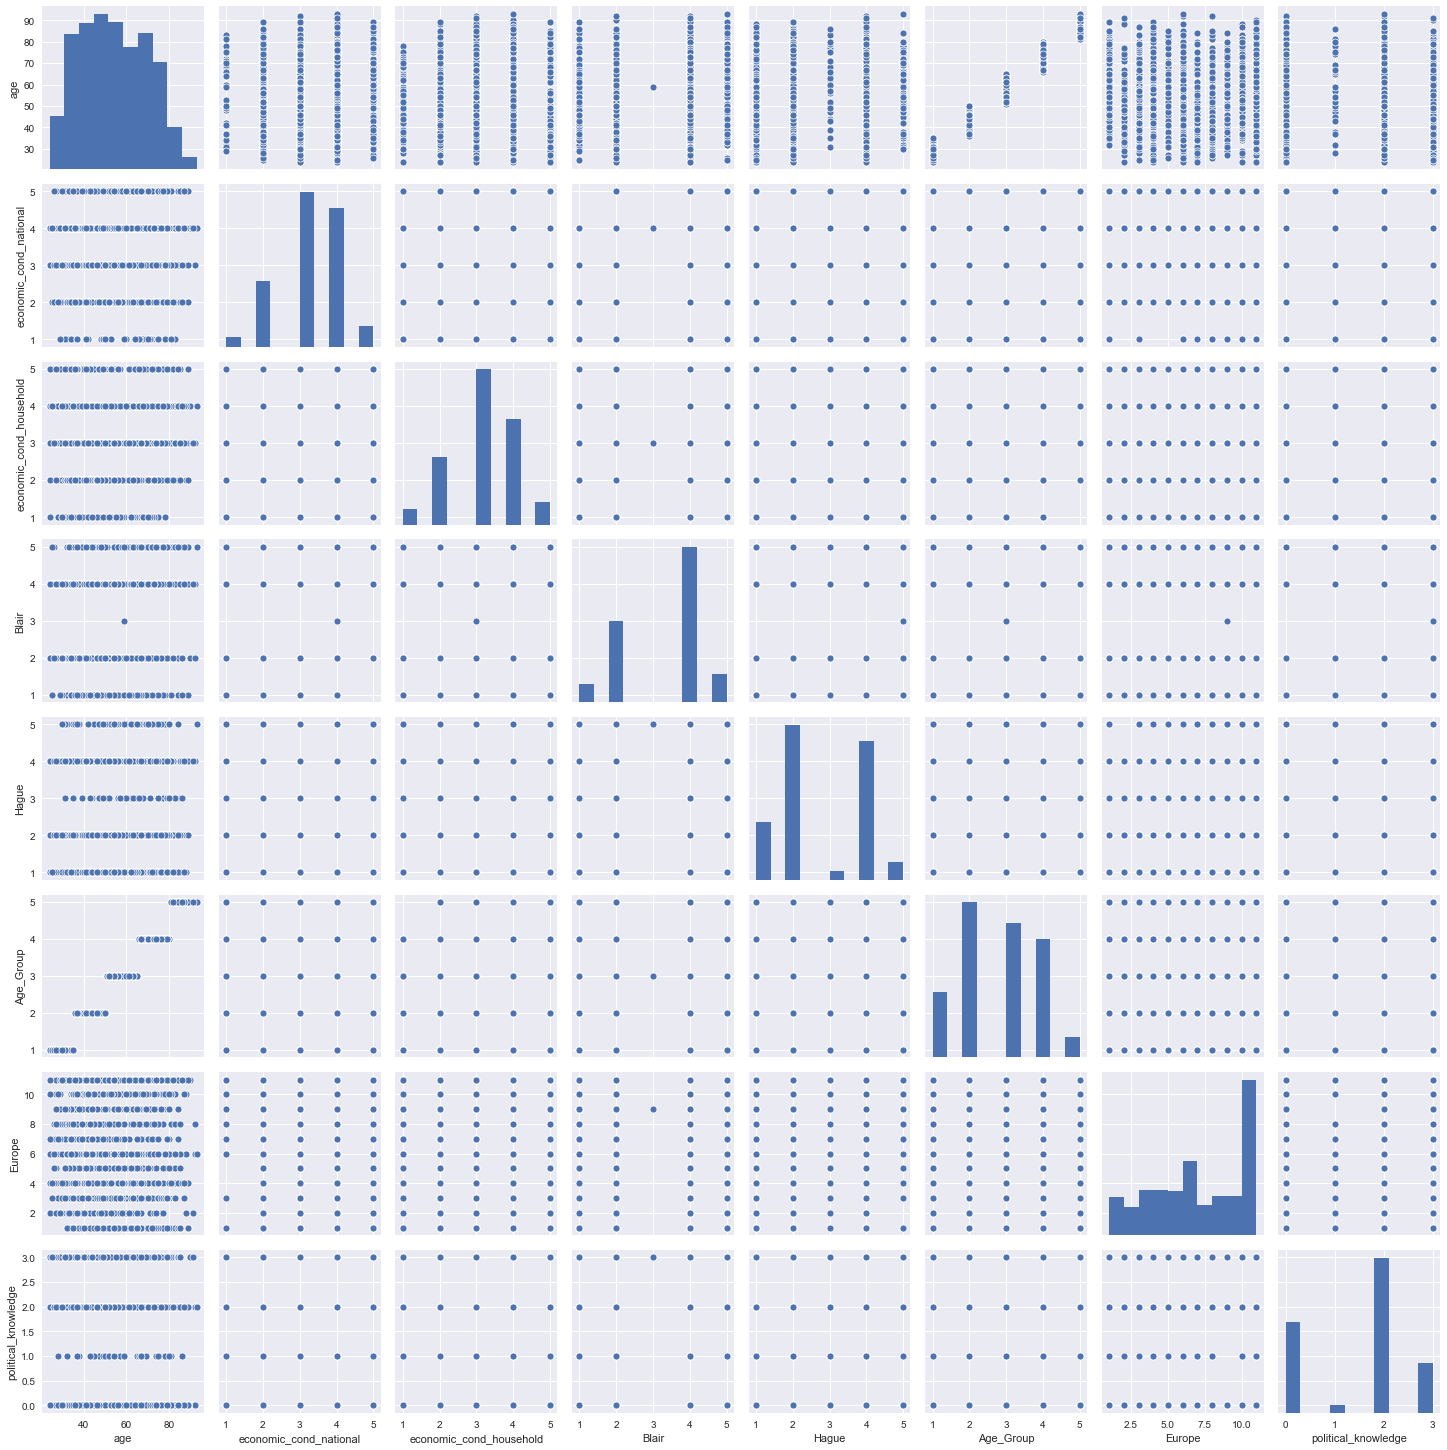

In [38]:
sns.pairplot(df)

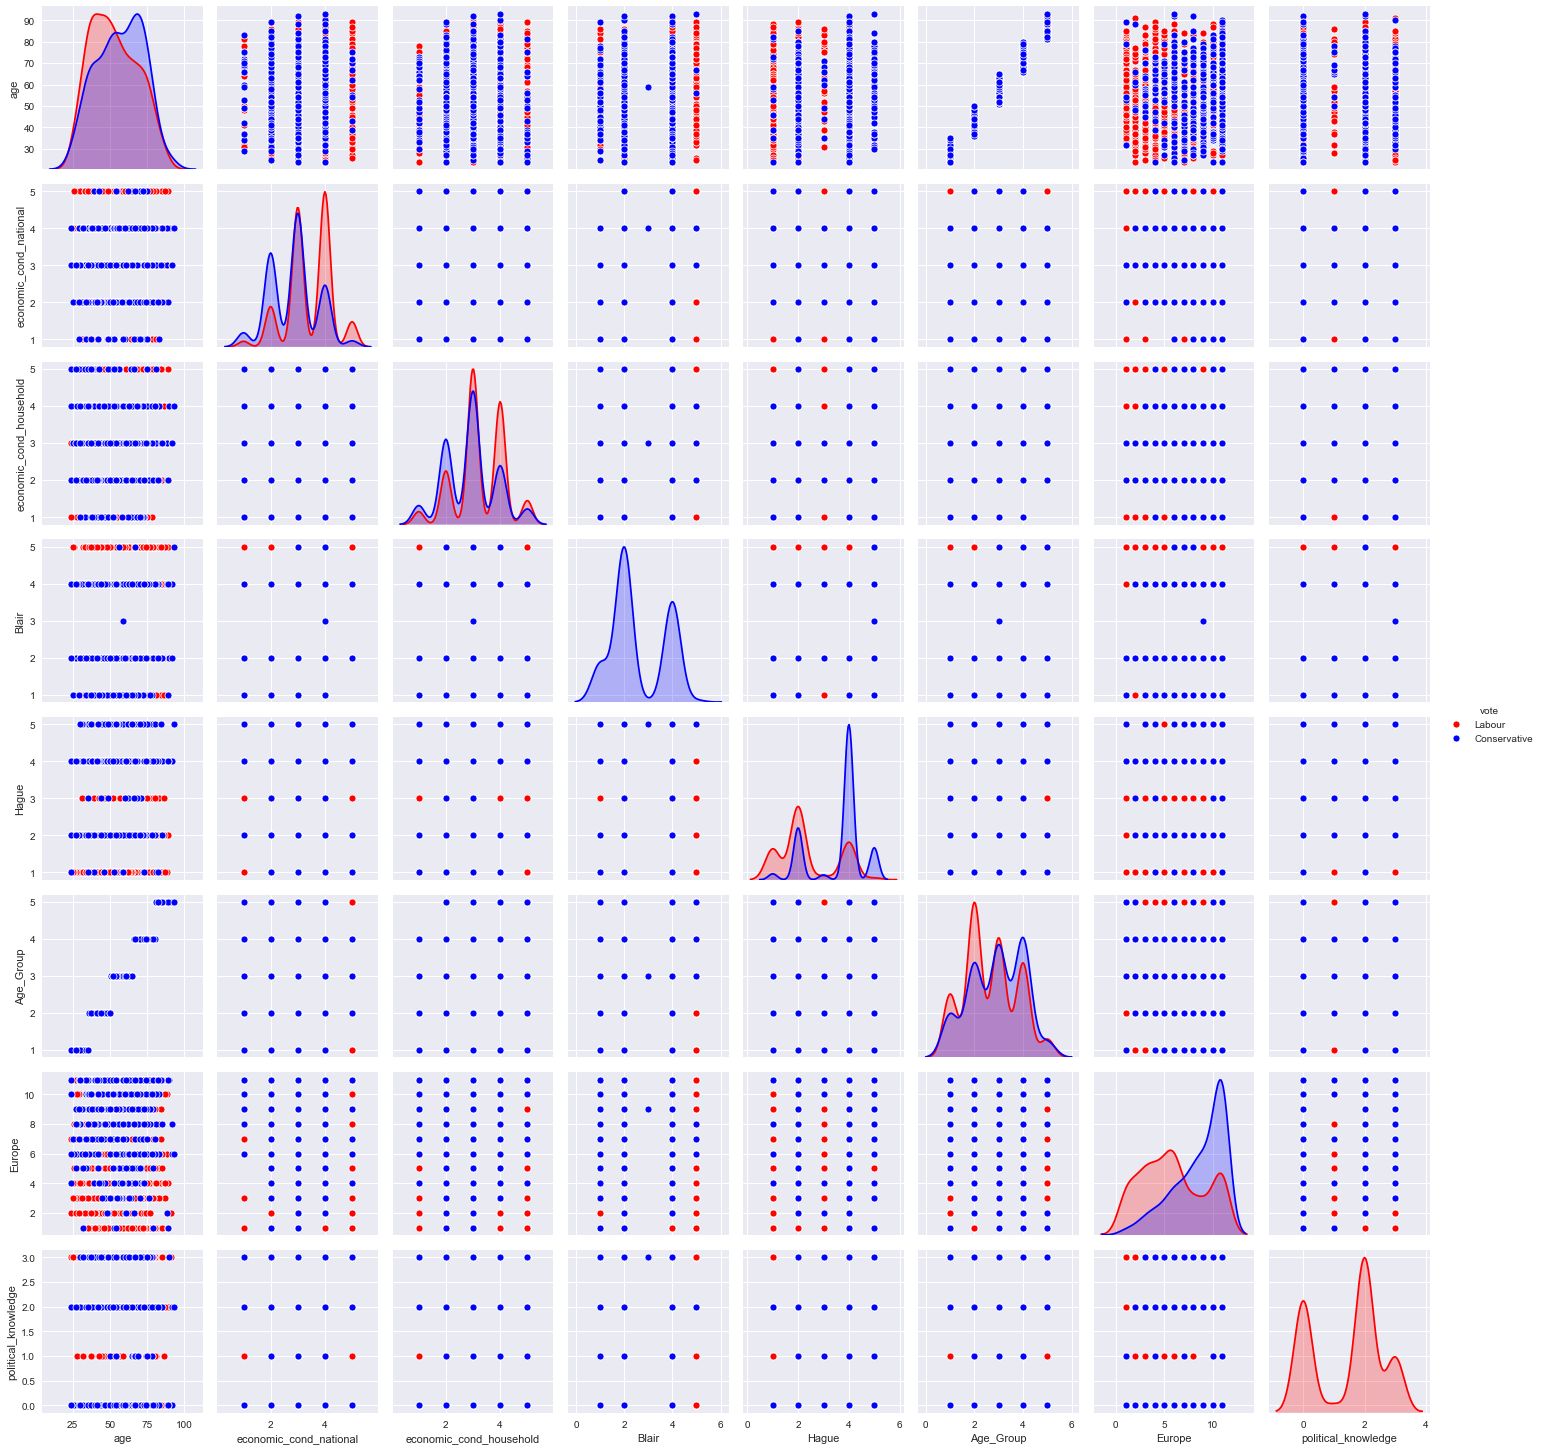

In [39]:
sns.pairplot(df,hue='vote',palette=['red','blue'], diag_kind='kde')

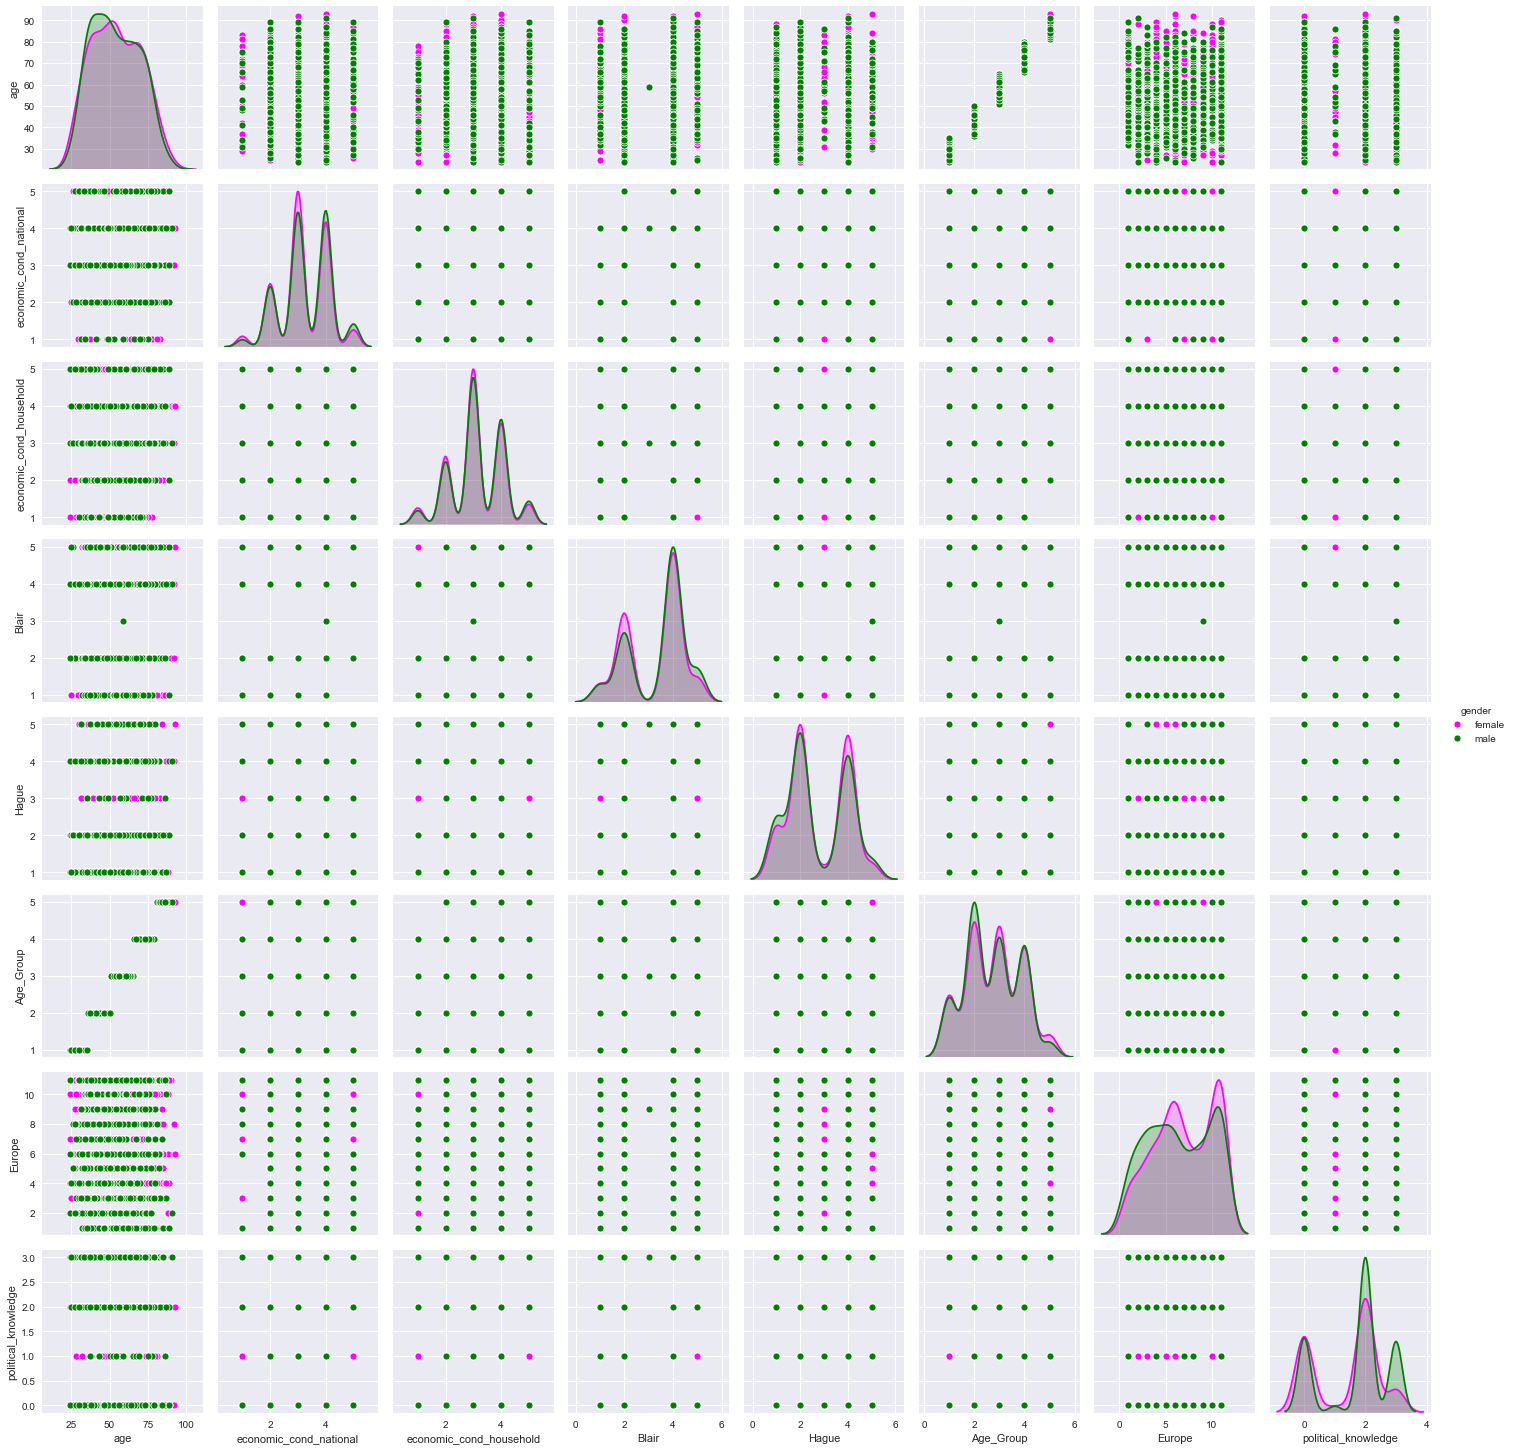

In [40]:
sns.pairplot(df,hue='gender', palette=['magenta','green'], diag_kind='kde')

**1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.**

In [41]:
#df.gender = df.gender.astype('category')
#df.gender = df.gender.cat.codes
df.vote = df.vote.astype('category')
df.vote = df.vote.cat.codes
df.head()
# Female 0, Male 1
# Conservative 0, Labour 1

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Age_Group,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,2,female
1,1,36,4,4,4,4,2,5,2,male
2,1,35,4,4,5,2,1,3,2,male
3,1,24,4,2,2,1,1,4,0,female
4,1,41,2,2,1,1,2,6,2,male


<Figure size 288x288 with 0 Axes>

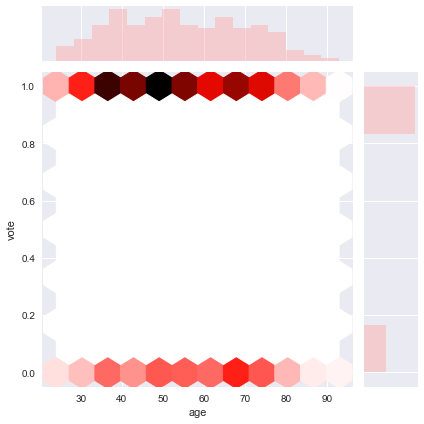

In [42]:
plt.figure(figsize=(4,4))
sns.jointplot(df.age, df.vote, color = 'r', kind='hex')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   int8  
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   object
 3   economic_cond_household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Age_Group                1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political_knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(1), int8(1), object(8)
memory usage: 108.8+ KB


In [44]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge', 'gender']
['vote', 'age']


In [45]:
df = pd.get_dummies(df, columns = {'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge'} ,drop_first=False)

In [46]:
df = pd.get_dummies(df,columns = {'gender'}, drop_first=True)

In [47]:
df = df.drop('age', axis = 1)# Dropping age

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   vote                       1525 non-null   int8 
 1   Age_Group_1                1525 non-null   uint8
 2   Age_Group_2                1525 non-null   uint8
 3   Age_Group_3                1525 non-null   uint8
 4   Age_Group_4                1525 non-null   uint8
 5   Age_Group_5                1525 non-null   uint8
 6   economic_cond_household_1  1525 non-null   uint8
 7   economic_cond_household_2  1525 non-null   uint8
 8   economic_cond_household_3  1525 non-null   uint8
 9   economic_cond_household_4  1525 non-null   uint8
 10  economic_cond_household_5  1525 non-null   uint8
 11  Europe_1                   1525 non-null   uint8
 12  Europe_2                   1525 non-null   uint8
 13  Europe_3                   1525 non-null   uint8
 14  Europe_4                

In [49]:
df.std()

vote                         0.459685
Age_Group_1                  0.338388
Age_Group_2                  0.464308
Age_Group_3                  0.445538
Age_Group_4                  0.427622
Age_Group_5                  0.197556
economic_cond_household_1    0.202072
economic_cond_household_2    0.387290
economic_cond_household_3    0.494493
economic_cond_household_4    0.453225
economic_cond_household_5    0.238171
Europe_1                     0.257702
Europe_2                     0.221702
Europe_3                     0.278362
Europe_4                     0.276394
Europe_5                     0.273403
Europe_6                     0.344012
Europe_7                     0.230756
Europe_8                     0.260947
Europe_9                     0.259872
Europe_10                    0.248764
Europe_11                    0.415486
Hague_1                      0.359900
Hague_2                      0.491844
Hague_3                      0.153913
Hague_4                      0.481840
Hague_5     

In [50]:
df.var()

vote                         0.211310
Age_Group_1                  0.114506
Age_Group_2                  0.215582
Age_Group_3                  0.198504
Age_Group_4                  0.182860
Age_Group_5                  0.039028
economic_cond_household_1    0.040833
economic_cond_household_2    0.149994
economic_cond_household_3    0.244523
economic_cond_household_4    0.205413
economic_cond_household_5    0.056726
Europe_1                     0.066410
Europe_2                     0.049152
Europe_3                     0.077485
Europe_4                     0.076393
Europe_5                     0.074749
Europe_6                     0.118344
Europe_7                     0.053248
Europe_8                     0.068093
Europe_9                     0.067533
Europe_10                    0.061884
Europe_11                    0.172629
Hague_1                      0.129528
Hague_2                      0.241910
Hague_3                      0.023689
Hague_4                      0.232170
Hague_5     

**Train - Test Split**

In [51]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)
# Copy target into the y dataframe.  
y = df['vote']

In [52]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=27)

**1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)**

**Logistic Regression Model**

In [53]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [55]:
ytest_predict_prob=logit_model.predict_proba(X_test)

In [56]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [57]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [58]:
def performance_matrices_maj(model, X_data, y_data, y_predicted): #will be used for final comparison
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [59]:
logit_train_met1,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.84
logit_train_precision  0.77
logit_train_recall  0.7
logit_train_f1  0.73


In [60]:
logit_train_met1

,precision,recall,f1-score,support
0,0.770270,0.699387,0.733119,326.000000
1,0.872892,0.908232,0.890212,741.000000
accuracy,0.844424,0.844424,0.844424,0.844424
macro avg,0.821581,0.803809,0.811665,1067.000000
weighted avg,0.841538,0.844424,0.842215,1067.000000


In [61]:
def draw_cm(actual, predicted, title):
    cm = confusion_matrix(actual, predicted, [0,1])
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12},
              xticklabels = ["Conservative", "Labour"],
              yticklabels = ["Conservative", "Labour"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.yticks(rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

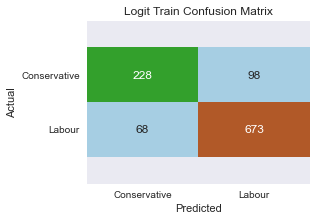

In [62]:
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

In [63]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

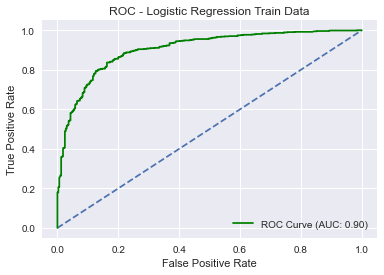

logit_train_auc 0.9042704685261997


In [64]:
logit_train_auc1, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')

print('logit_train_auc', logit_train_auc1)

In [65]:
logit_test_met1,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
logit_test_met_maj1,logit_test_accu_maj, logit_test_precision_maj, logit_test_recall_maj, logit_test_f1_maj = performance_matrices_maj(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.68
logit_test_f1  0.69


In [66]:
logit_test_met1

,precision,recall,f1-score,support
0,0.699248,0.683824,0.691450,136.000000
1,0.867692,0.875776,0.871716,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.783470,0.779800,0.781583,458.000000
weighted avg,0.817674,0.818777,0.818187,458.000000


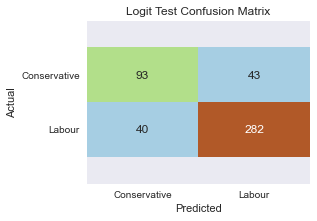

In [67]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

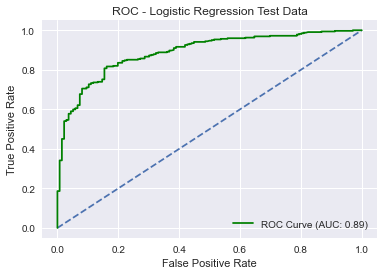

logit_test_auc 0.8888495615637558


In [68]:
logit_test_auc1, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc1)

**LDA Model**

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [70]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [71]:
ytest_predict_prob=LDA_model.predict_proba(X_test)

In [72]:
LDA_train_met1,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
LDA_train_met_maj1,LDA_train_accu_maj,LDA_train_precision_maj,LDA_train_recall_maj,LDA_train_f1_maj = performance_matrices_maj(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.85
LDA_train_precision  0.77
LDA_train_recall  0.72
LDA_train_f1  0.75


In [73]:
LDA_train_met1

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


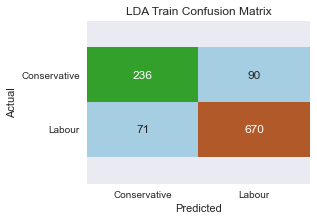

In [74]:
draw_cm(y_train,ytrain_predict,"LDA Train Confusion Matrix")

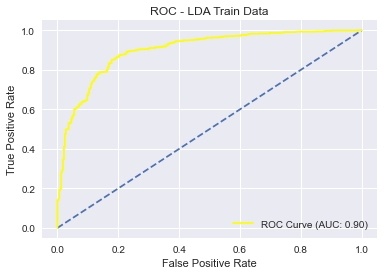

LDA_train_auc 0.8994808872109487


In [75]:
LDA_train_auc1, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(LDA_model, X_train, y_train, 'yellow', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc1)

In [76]:
LDA_test_met1,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
LDA_test_met_maj1,LDA_test_accu_maj,LDA_test_precision_maj,LDA_test_recall_maj,LDA_test_f1_maj = performance_matrices_maj(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.82
LDA_test_precision  0.68
LDA_test_recall  0.71
LDA_test_f1  0.7


In [77]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


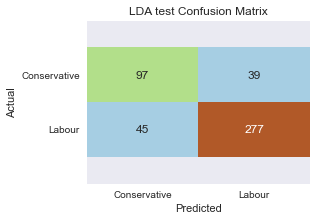

In [78]:
draw_cm(y_test,ytest_predict,"LDA test Confusion Matrix")

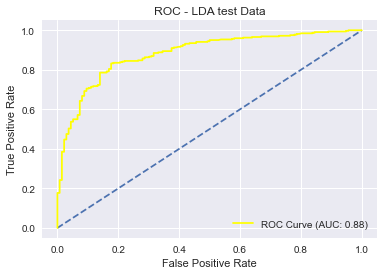

LDA_test_auc 0.882775392765802


In [79]:
LDA_test_auc1, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'yellow', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc1)

**1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)**

**KNN Model**

In [80]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [82]:
ytest_predict_prob=KNN_model.predict_proba(X_test)

In [83]:
KNN_train_met1,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train, y_train, ytrain_predict)
KNN_train_met_maj1,KNN_train_accu_maj,KNN_train_precision_maj,KNN_train_recall_maj,KNN_train_f1_maj = performance_matrices_maj(KNN_model, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.86
KNN_train_precision  0.79
KNN_train_recall  0.73
KNN_train_f1  0.76


In [84]:
KNN_train_met1

,precision,recall,f1-score,support
0,0.788079,0.730061,0.757962,326.000000
1,0.884967,0.913630,0.899070,741.000000
accuracy,0.857545,0.857545,0.857545,0.857545
macro avg,0.836523,0.821846,0.828516,1067.000000
weighted avg,0.855365,0.857545,0.855958,1067.000000


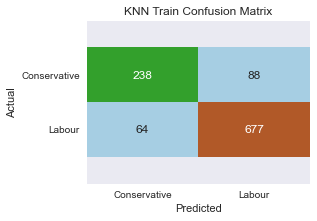

In [85]:
draw_cm(y_train,ytrain_predict,"KNN Train Confusion Matrix")

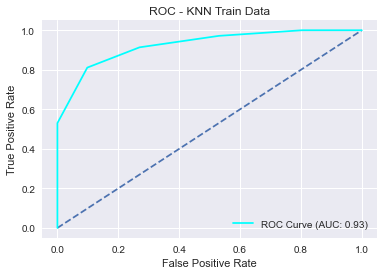

KNN_train_auc 0.9252088456156908


In [86]:
KNN_train_auc1, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc1)

In [87]:
KNN_test_met1,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
KNN_test_met_maj1,KNN_test_accu_maj,KNN_test_precision_maj,KNN_test_recall_maj,KNN_test_f1_maj = performance_matrices_maj(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.8
KNN_test_precision  0.68
KNN_test_recall  0.62
KNN_test_f1  0.65


In [88]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.677419,0.617647,0.646154,136.000000
1,0.844311,0.875776,0.859756,322.000000
accuracy,0.799127,0.799127,0.799127,0.799127
macro avg,0.760865,0.746712,0.752955,458.000000
weighted avg,0.794754,0.799127,0.796328,458.000000


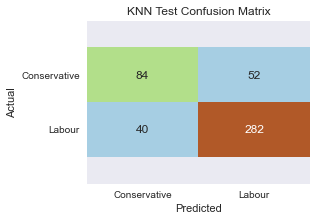

In [89]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

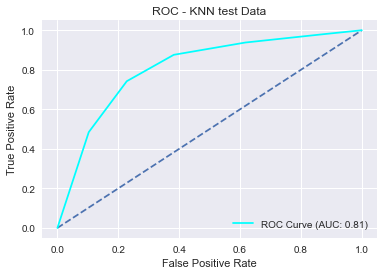

KNN_test_auc 0.8104676653270003


In [90]:
KNN_test_auc1, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc1)

**NAIVE BAYES Model**

In [91]:
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [92]:
ytrain_predict = MNB_model.predict(X_train)
ytest_predict = MNB_model.predict(X_test)

In [93]:
ytest_predict_prob=MNB_model.predict_proba(X_test)

In [94]:
MNB_train_met1,MNB_train_accu,MNB_train_precision,MNB_train_recall,MNB_train_f1 = performance_matrices(MNB_model, X_train, y_train, ytrain_predict)
MNB_train_met_maj1,MNB_train_accu_maj,MNB_train_precision_maj,MNB_train_recall_maj,MNB_train_f1_maj = performance_matrices_maj(MNB_model, X_train, y_train, ytrain_predict)
print ('MNB_train_accu ',MNB_train_accu)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_accu  0.84
MNB_train_precision  0.74
MNB_train_recall  0.73
MNB_train_f1  0.73


In [95]:
MNB_train_met1

,precision,recall,f1-score,support
0,0.740625,0.726994,0.733746,326.0000
1,0.880857,0.887989,0.884409,741.0000
accuracy,0.838800,0.838800,0.838800,0.8388
macro avg,0.810741,0.807492,0.809077,1067.0000
weighted avg,0.838012,0.838800,0.838377,1067.0000


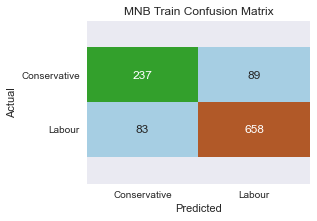

In [96]:
draw_cm(y_train,ytrain_predict,"MNB Train Confusion Matrix")

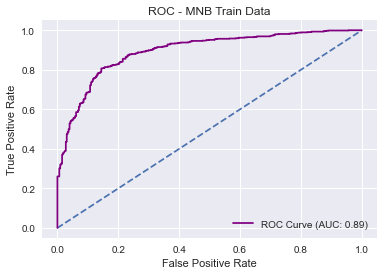

MNB_train_auc 0.8934287109940968


In [97]:
MNB_train_auc1, MNB_train_fpr, MNB_train_tpr = draw_auc_roc(MNB_model, X_train, y_train, 'purple', 'ROC - MNB Train Data')
print('MNB_train_auc', MNB_train_auc1)

In [98]:
MNB_test_met1,MNB_test_accu,MNB_test_precision,MNB_test_recall,MNB_test_f1 = performance_matrices(MNB_model, X_test, y_test, ytest_predict)
MNB_test_met_maj1,MNB_test_accu_maj,MNB_test_precision_maj,MNB_test_recall_maj,MNB_test_f1_maj = performance_matrices_maj(MNB_model, X_test, y_test, ytest_predict)
print ('MNB_test_accu ',MNB_test_accu)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_accu  0.83
MNB_test_precision  0.71
MNB_test_recall  0.74
MNB_test_f1  0.72


In [99]:
MNB_test_met1

,precision,recall,f1-score,support
0,0.706294,0.742647,0.724014,136.000000
1,0.888889,0.869565,0.879121,322.000000
accuracy,0.831878,0.831878,0.831878,0.831878
macro avg,0.797591,0.806106,0.801568,458.000000
weighted avg,0.834668,0.831878,0.833063,458.000000


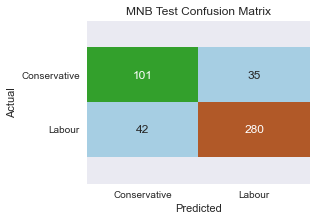

In [100]:
draw_cm(y_test,ytest_predict,"MNB Test Confusion Matrix")

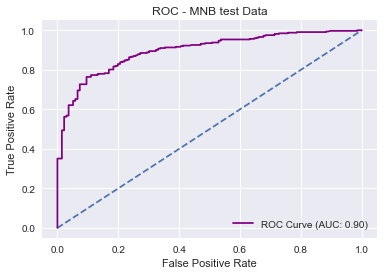

MNB_test_auc 0.8970474059188892


In [101]:
MNB_test_auc1, MNB_test_fpr, MNB_test_tpr = draw_auc_roc(MNB_model, X_test, y_test, 'purple', 'ROC - MNB test Data')
print('MNB_test_auc', MNB_test_auc1)

**1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.**

**MODEL TUNING using SMOTE**

In [102]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [103]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1067, 41)
After SMOTE:  (1482, 41)


**LOGIT with SMOTE**

In [104]:
logit_res_model = LogisticRegression()
logit_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [105]:
ytrain_predict = logit_res_model.predict(X_train_res)
ytest_predict = logit_res_model.predict(X_test)

In [106]:
logit_test_met2,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.82
logit_res_test_precision  0.69
logit_res_test_recall  0.71
logit_res_test_f1  0.7


In [107]:
logit_test_met2

,precision,recall,f1-score,support
0,0.685714,0.705882,0.695652,136.000000
1,0.874214,0.863354,0.868750,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779964,0.784618,0.782201,458.000000
weighted avg,0.818240,0.816594,0.817350,458.000000


No significant improvement in test performance

**LDA with SMOTE**

In [108]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)
#LDA_model

LinearDiscriminantAnalysis()

In [109]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [110]:
LDA_test_met2,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.7
LDA_res_test_precision  0.0
LDA_res_test_recall  0.0
LDA_res_test_f1  0.0


In [111]:
LDA_test_met2

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,136.000000
1,0.703057,1.000000,0.825641,322.000000
accuracy,0.703057,0.703057,0.703057,0.703057
macro avg,0.351528,0.500000,0.412821,458.000000
weighted avg,0.494289,0.703057,0.580473,458.000000


In [112]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


No significant improvement in LDA model

**KNN with SMOTE**

In [113]:
KNN_res_model=KNeighborsClassifier()
KNN_res_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [114]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [115]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.8
KNN_res_test_precision  0.67
KNN_res_test_recall  0.63
KNN_res_test_f1  0.65


In [116]:
KNN_test_met2

,precision,recall,f1-score,support
0,0.666667,0.632353,0.649057,136.000000
1,0.848024,0.866460,0.857143,322.000000
accuracy,0.796943,0.796943,0.796943,0.796943
macro avg,0.757345,0.749406,0.753100,458.000000
weighted avg,0.794171,0.796943,0.795353,458.000000


In [117]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.677419,0.617647,0.646154,136.000000
1,0.844311,0.875776,0.859756,322.000000
accuracy,0.799127,0.799127,0.799127,0.799127
macro avg,0.760865,0.746712,0.752955,458.000000
weighted avg,0.794754,0.799127,0.796328,458.000000


Test performance descreased

**MNB with SMOTE**

In [118]:
MNB_res_model = MultinomialNB()
MNB_res_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [119]:
ytrain_predict = MNB_res_model.predict(X_train_res)
ytest_predict = MNB_res_model.predict(X_test)

In [120]:
MNB_test_met2,MNB_res_test_accu,MNB_res_test_precision,MNB_res_test_recall,MNB_res_test_f1 = performance_matrices(MNB_res_model, X_test, y_test, ytest_predict)
print ('MNB_res_test_accu ',MNB_res_test_accu)
print ('MNB_res_test_precision ',MNB_res_test_precision)
print ('MNB_res_test_recall ',MNB_res_test_recall)
print ('MNB_res_test_f1 ',MNB_res_test_f1)

MNB_res_test_accu  0.75
MNB_res_test_precision  0.62
MNB_res_test_recall  0.45
MNB_res_test_f1  0.52


In [121]:
MNB_test_met2

,precision,recall,f1-score,support
0,0.616162,0.448529,0.519149,136.000000
1,0.791086,0.881988,0.834068,322.000000
accuracy,0.753275,0.753275,0.753275,0.753275
macro avg,0.703624,0.665258,0.676608,458.000000
weighted avg,0.739144,0.753275,0.740555,458.000000


In [122]:
MNB_test_met1

,precision,recall,f1-score,support
0,0.706294,0.742647,0.724014,136.000000
1,0.888889,0.869565,0.879121,322.000000
accuracy,0.831878,0.831878,0.831878,0.831878
macro avg,0.797591,0.806106,0.801568,458.000000
weighted avg,0.834668,0.831878,0.833063,458.000000


Test performance descreased

No improvement in performance metrices could be found using SMOTE. SMOTE is effecttive only if the minority class is 1 to 2%, but here it is 30%

**Hyperparameter tuning using GridsearchCV**

**Logistic Regression using Gridsearch CV**

In [123]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:2, 1:1})
clf = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model3 = GridSearchCV(clf, param_grid = grid_values,cv = 10)
logit_model3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [124]:
logit_model3.best_estimator_

LogisticRegression(C=0.0379269019073225, class_weight={0: 2, 1: 1},
                   solver='newton-cg')

In [125]:
#ytrain_predict = logit_model.predict(X_train_res)
ytrain_predict = logit_model3.predict(X_train)
ytest_predict = logit_model3.predict(X_test)

In [126]:
#logit_train_met3,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model3, X_train_res, y_train_res, ytrain_predict)
logit_train_met3,logit_train_accu3, logit_train_precision3, logit_train_recall3, logit_train_f13 = performance_matrices(logit_model3, X_train, y_train, ytrain_predict)
logit_train_met_maj3,logit_train_accu_maj3, logit_train_precision_maj3, logit_train_recall_maj3, logit_train_f1_maj3 = performance_matrices_maj(logit_model3, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu3)
print ('logit_train_precision ',logit_train_precision3)
print ('logit_train_recall ',logit_train_recall3)
print ('logit_train_f1 ',logit_train_f13)

logit_train_accu  0.84
logit_train_precision  0.71
logit_train_recall  0.8
logit_train_f1  0.76


In [127]:
logit_train_met3

,precision,recall,f1-score,support
0,0.711957,0.803681,0.755043,326.000000
1,0.908441,0.856950,0.881944,741.000000
accuracy,0.840675,0.840675,0.840675,0.840675
macro avg,0.810199,0.830316,0.818494,1067.000000
weighted avg,0.848409,0.840675,0.843172,1067.000000


In [128]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.68
logit_test_f1  0.69


In [129]:
logit_test_met3

,precision,recall,f1-score,support
0,0.644970,0.801471,0.714754,136.000000
1,0.906574,0.813665,0.857610,322.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.775772,0.807568,0.786182,458.000000
weighted avg,0.828893,0.810044,0.815190,458.000000


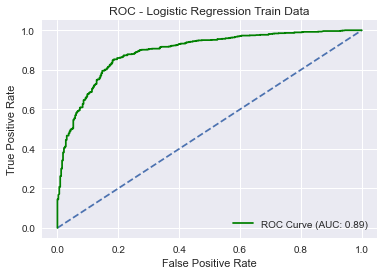

logit_train_auc 0.892145417815421


In [130]:
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model3, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc3)

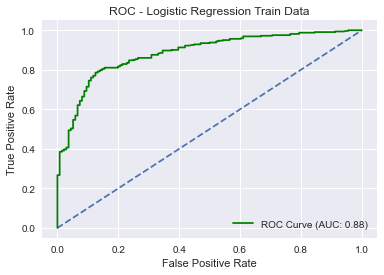

logit_test_auc 0.8848305626598465


In [131]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model3, X_test, y_test, 'green', 'ROC - Logistic Regression Train Data')
print('logit_test_auc', logit_test_auc3)

**Linear Discriminant Analysis with GridsearchCV**

In [132]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [133]:
LDA_model3.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [134]:
#ytrain_predict = LDA_model3.predict(X_train_res)
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [135]:
LDA_train_met3,LDA_train_accu3,LDA_train_precision3,LDA_train_recall3,LDA_train_f13 = performance_matrices(LDA_model3, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu3)
print ('LDA_train_precision ',LDA_train_precision3)
print ('LDA_train_recall ',LDA_train_recall3)
print ('LDA_train_f1 ',LDA_train_f13)

LDA_train_accu  0.85
LDA_train_precision  0.77
LDA_train_recall  0.72
LDA_train_f1  0.75


In [136]:
LDA_train_met3

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


In [137]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.82
LDA_test_precision  0.68
LDA_test_recall  0.71
LDA_test_f1  0.7


In [138]:
LDA_test_met3

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


**KNN Model with GridsearchCV**

In [139]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 5)
KNN_model3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

In [140]:
KNN_model3.best_params_

{'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'uniform'}

In [141]:
#ytrain_predict = KNN_model3.predict(X_train_res)
ytrain_predict = KNN_model3.predict(X_train)
ytest_predict = KNN_model3.predict(X_test)

In [142]:
KNN_train_met3,KNN_train_accu3,KNN_train_precision3,KNN_train_recall3,KNN_train_f13 = performance_matrices(KNN_model3, X_train, y_train, ytrain_predict)
KNN_train_met_maj3,KNN_train_accu_maj3,KNN_train_precision_maj3,KNN_train_recall_maj3,KNN_train_f1_maj3 = performance_matrices_maj(KNN_model3, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu3) 
print ('KNN_train_precision ',KNN_train_precision3)
print ('KNN_train_recall ',KNN_train_recall3)
print ('KNN_train_f1 ',KNN_train_f13)

KNN_train_accu  0.84
KNN_train_precision  0.8
KNN_train_recall  0.62
KNN_train_f1  0.7


In [143]:
KNN_train_met3

,precision,recall,f1-score,support
0,0.797619,0.616564,0.695502,326.000000
1,0.846626,0.931174,0.886889,741.000000
accuracy,0.835052,0.835052,0.835052,0.835052
macro avg,0.822122,0.773869,0.791196,1067.000000
weighted avg,0.831653,0.835052,0.828415,1067.000000


In [144]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, X_test, y_test, ytest_predict)
KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.8
KNN_test_precision  0.7
KNN_test_recall  0.59
KNN_test_f1  0.64


In [145]:
KNN_test_met3

,precision,recall,f1-score,support
0,0.701754,0.588235,0.640000,136.000000
1,0.837209,0.894410,0.864865,322.000000
accuracy,0.803493,0.803493,0.803493,0.803493
macro avg,0.769482,0.741323,0.752432,458.000000
weighted avg,0.796987,0.803493,0.798093,458.000000


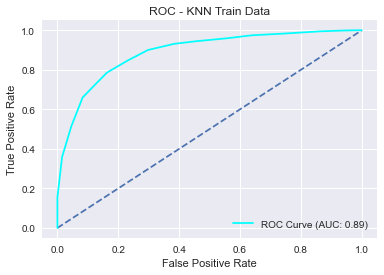

KNN_train_auc 0.8898893056142007


In [146]:
KNN_train_auc3, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model3, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc3)

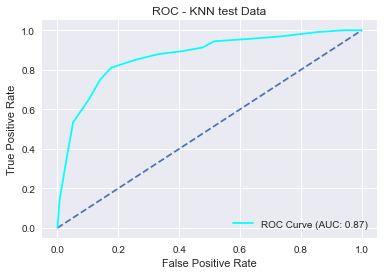

KNN_test_auc 0.8696679758860065


In [147]:
KNN_test_auc3, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model3, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc3)

**Multinomial Naive Bayes - No hyperparameters (except prior) to Gridsearch**

**Bagging using RandomForest**

In [148]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:4, 1:1.5})
rfcl = RandomForestClassifier(class_weight=class_weight, 
                              min_samples_leaf=2,
                              min_samples_split=4)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

In [149]:
#ytrain_predict = Bagging_model.predict(X_train_res)
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [150]:
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
Bagging_met_maj,Bagging_train_accu_maj,Bagging_train_precision_maj,Bagging_train_recall_maj,Bagging_train_f1_maj = performance_matrices_maj(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.89
Bagging_train_precision  0.8
Bagging_train_recall  0.87
Bagging_train_f1  0.83


In [151]:
Bagging_met

,precision,recall,f1-score,support
0,0.801136,0.865031,0.831858,326.000000
1,0.938462,0.905533,0.921703,741.000000
accuracy,0.893158,0.893158,0.893158,0.893158
macro avg,0.869799,0.885282,0.876781,1067.000000
weighted avg,0.896505,0.893158,0.894253,1067.000000


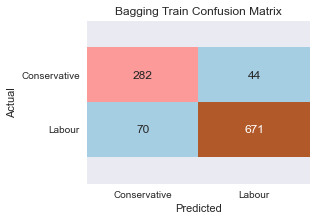

In [152]:
draw_cm(y_train,ytrain_predict,"Bagging Train Confusion Matrix")

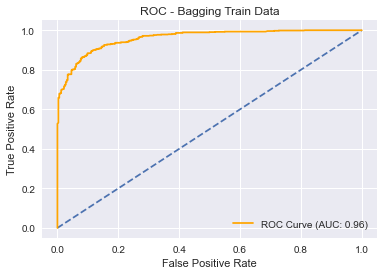

Bagging_train_auc 0.9600937217985975


In [153]:
Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train, y_train, 'orange', 'ROC - Bagging Train Data')
print('Bagging_train_auc', Bagging_train_auc)

In [154]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
Bagging_met_maj,Bagging_test_accu_maj,Bagging_test_precision_maj,Bagging_test_recall_maj,Bagging_test_f1_maj = performance_matrices_maj(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.81
Bagging_test_precision  0.65
Bagging_test_recall  0.79
Bagging_test_f1  0.71


In [155]:
Bagging_met

,precision,recall,f1-score,support
0,0.648485,0.786765,0.710963,136.000000
1,0.901024,0.819876,0.858537,322.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.774754,0.803320,0.784750,458.000000
weighted avg,0.826034,0.810044,0.814716,458.000000


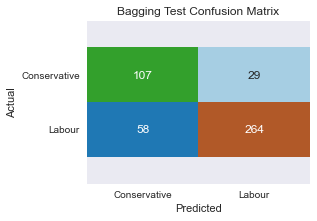

In [156]:
draw_cm(y_test,ytest_predict,"Bagging Test Confusion Matrix")

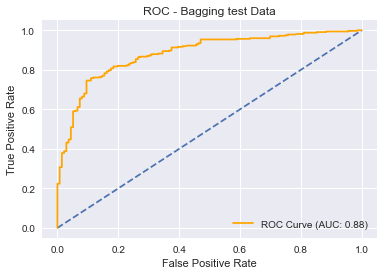

Bagging_test_auc 0.8826612166605773


In [157]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'orange', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

**XGBoost**

In [158]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000)
XGB_model.fit(X_train, y_train)

[23:43:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [160]:
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
XGB_met_maj,XGB_train_accu_maj,XGB_train_precision_maj,XGB_train_recall_maj,XGB_train_f1_maj = performance_matrices_maj(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.89
XGB_train_precision  0.85
XGB_train_recall  0.77
XGB_train_f1  0.81


In [161]:
XGB_met

,precision,recall,f1-score,support
0,0.850847,0.769939,0.808374,326.000000
1,0.902850,0.940621,0.921348,741.000000
accuracy,0.888472,0.888472,0.888472,0.888472
macro avg,0.876849,0.855280,0.864861,1067.000000
weighted avg,0.886962,0.888472,0.886831,1067.000000


In [162]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
XGB_met_maj,XGB_test_accu_maj,XGB_test_precision_maj,XGB_test_recall_maj,XGB_test_f1_maj = performance_matrices_maj(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.82
XGB_test_precision  0.7
XGB_test_recall  0.68
XGB_test_f1  0.69


In [163]:
XGB_met

,precision,recall,f1-score,support
0,0.704545,0.683824,0.694030,136.000000
1,0.868098,0.878882,0.873457,322.000000
accuracy,0.820961,0.820961,0.820961,0.820961
macro avg,0.786322,0.781353,0.783743,458.000000
weighted avg,0.819532,0.820961,0.820177,458.000000


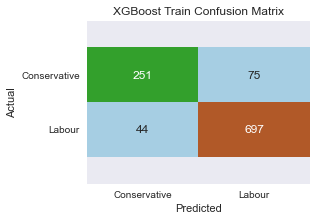

In [164]:
draw_cm(y_train,ytrain_predict,"XGBoost Train Confusion Matrix")

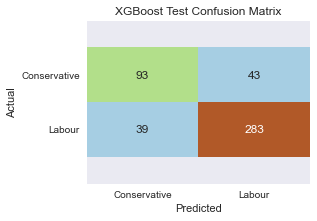

In [165]:
draw_cm(y_test,ytest_predict,"XGBoost Test Confusion Matrix")

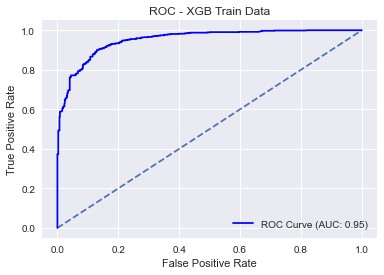

XGB_train_auc 0.9521627956531002


In [166]:
XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train_res, y_train_res, 'blue', 'ROC - XGB Train Data')
print('XGB_train_auc', XGB_train_auc)

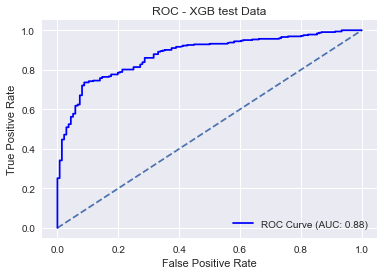

XGB_test_auc 0.877500456704421


In [167]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'blue', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

**Gradient Boosting Classifier**

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [169]:
ytrain_predict = GBC_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [170]:
GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train, y_train, ytrain_predict)
print ('GBC_train_accu ',GBC_train_accu)
print ('GBC_train_precision ',GBC_train_precision)
print ('GBC_train_recall ',GBC_train_recall)
print ('GBC_train_f1 ',GBC_train_f1)

GBC_train_accu  0.99
GBC_train_precision  0.98
GBC_train_recall  0.98
GBC_train_f1  0.98


In [171]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.76
GBC_test_precision  0.6
GBC_test_recall  0.6
GBC_test_f1  0.6


**1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)**

In [172]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu3,logit_train_auc3,logit_train_recall3,logit_train_recall_maj3,logit_train_precision3,logit_train_precision_maj3,logit_train_f13,logit_train_f1_maj3],
                     'LDA Train':[LDA_train_accu,LDA_train_auc1,LDA_train_recall,LDA_train_recall_maj,LDA_train_precision,LDA_train_precision_maj,LDA_train_f1,LDA_train_f1_maj],
                     'KNN Train':[KNN_train_accu3,KNN_train_auc3,KNN_train_recall3,KNN_train_recall_maj3,KNN_train_precision3,KNN_train_precision_maj3,KNN_train_f13,KNN_train_f1_maj3],
                     'MNB Train':[MNB_train_accu,MNB_train_auc1,MNB_train_recall,MNB_train_recall_maj,MNB_train_precision,MNB_train_precision_maj,MNB_train_f1,MNB_train_f1_maj],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_recall_maj,Bagging_train_precision,Bagging_train_precision_maj,Bagging_train_f1,Bagging_train_f1_maj],
                     'XGB Train':[XGB_train_accu,XGB_train_auc,XGB_train_recall,XGB_train_recall_maj,XGB_train_precision,XGB_train_precision_maj,XGB_train_f1,XGB_train_f1_maj],
                     },index=index)
round(train_perf_data,2)

,Logit Train,LDA Train,KNN Train,MNB Train,Bagging Train,XGB Train
Accuracy,0.84,0.85,0.84,0.84,0.89,0.89
AUC,0.89,0.90,0.89,0.89,0.96,0.95
Recall-0,0.80,0.72,0.62,0.73,0.87,0.77
Recall-1,0.86,0.90,0.93,0.89,0.91,0.94
Precision-0,0.71,0.77,0.80,0.74,0.80,0.85
Precision-1,0.91,0.88,0.85,0.88,0.94,0.90
F1 Score-0,0.76,0.75,0.70,0.73,0.83,0.81
F1 Score-1,0.88,0.89,0.89,0.88,0.92,0.92


In [173]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
test_perf_data = pd.DataFrame({'Logit Test':[logit_test_accu3,logit_test_auc3,logit_test_recall3,logit_test_recall_maj3,logit_test_precision3,logit_test_precision_maj3,logit_test_f13,logit_test_f1_maj3],
                     'LDA Test':[LDA_test_accu,LDA_test_auc1,LDA_test_recall,LDA_test_recall_maj,LDA_test_precision,LDA_test_precision_maj,LDA_test_f1,LDA_test_f1_maj],
                     'KNN Test':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_recall_maj3,KNN_test_precision3,KNN_test_precision_maj3,KNN_test_f13,KNN_test_f1_maj3],
                     'MNB Test':[MNB_test_accu,MNB_test_auc1,MNB_test_recall,MNB_test_recall_maj,MNB_test_precision,MNB_test_precision_maj,MNB_test_f1,MNB_test_f1_maj], 
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_recall_maj,Bagging_test_precision,Bagging_test_precision_maj,Bagging_test_f1,Bagging_test_f1_maj],
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_recall_maj,XGB_test_precision,XGB_test_precision_maj,XGB_test_f1,XGB_test_f1_maj]
                    },index=index)
round(test_perf_data,2)

,Logit Test,LDA Test,KNN Test,MNB Test,Bagging Test,XGB Test
Accuracy,0.81,0.82,0.80,0.83,0.81,0.82
AUC,0.88,0.88,0.87,0.90,0.88,0.88
Recall-0,0.80,0.71,0.59,0.74,0.79,0.68
Recall-1,0.81,0.86,0.89,0.87,0.82,0.88
Precision-0,0.64,0.68,0.70,0.71,0.65,0.70
Precision-1,0.91,0.88,0.84,0.89,0.90,0.87
F1 Score-0,0.71,0.70,0.64,0.72,0.71,0.69
F1 Score-1,0.86,0.87,0.86,0.88,0.86,0.87


Text(0.5, 1.0, 'Model Performance in Train Datasets')

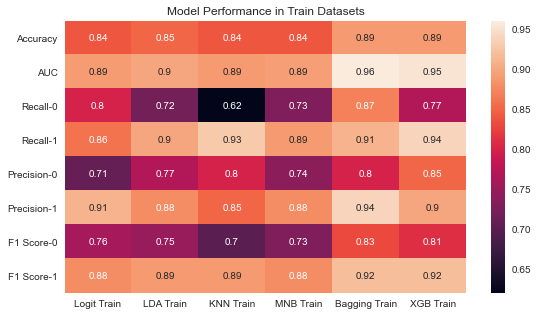

In [174]:
plt.subplots(figsize=(9,5))
sns.heatmap(train_perf_data, annot=True)
plt.title('Model Performance in Train Datasets')

Text(0.5, 1.0, 'Model Performance in Train Datasets')

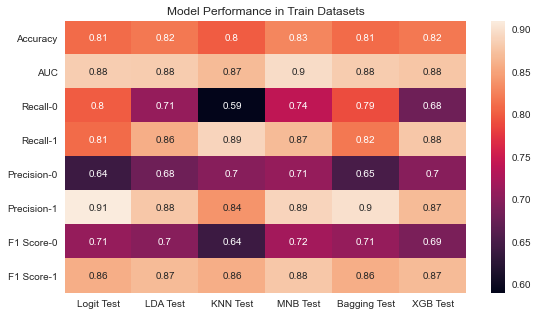

In [175]:
plt.subplots(figsize=(9,5))
sns.heatmap(test_perf_data, annot=True)
plt.title('Model Performance in Train Datasets')

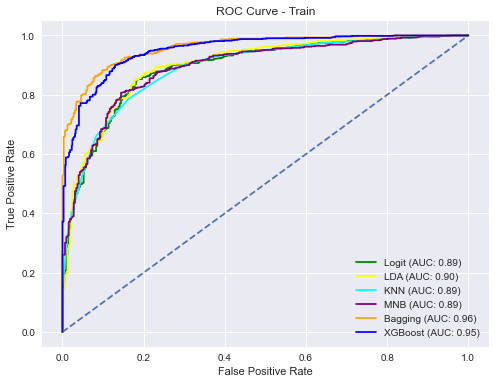

In [176]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_train_auc3)
plt.plot(LDA_train_fpr,LDA_train_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_train_auc1)
plt.plot(KNN_train_fpr,KNN_train_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_train_auc3)
plt.plot(MNB_train_fpr,MNB_train_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_train_auc1)
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_train_auc)
plt.plot(XGB_train_fpr,XGB_train_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train')
plt.legend(loc="lower right")


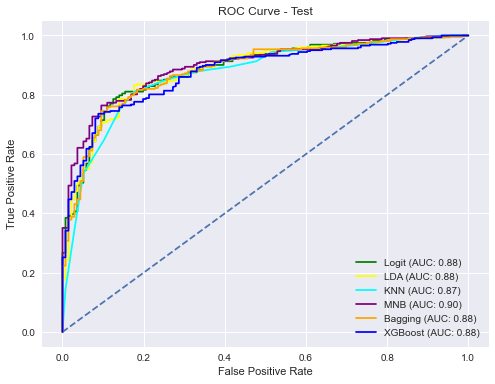

In [177]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_test_auc3)
plt.plot(LDA_test_fpr,LDA_test_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_test_auc1)
plt.plot(KNN_test_fpr,KNN_test_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_test_auc3)
plt.plot(MNB_test_fpr,MNB_test_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_test_auc1)
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_test_auc)
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")

**1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.**

Given in the Business report